In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, Conv1D, MaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding, GRU
import tensorflow as tf

In [3]:
df = pd.read_csv('./datasets/data_200.csv') 

In [4]:
df.head(3)

,text_parsed,money_laundering,text_parsed_length
0,running mayor 2016 thennorfolk sheriff bob mcc...,1,2796
1,ed probing former legislator money laundering ...,1,2513
2,enforcement directorate issued lookout notice ...,1,1891


#### Split the dataset into training and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df['text_parsed'], 
                                                    df['money_laundering'],
                                                    test_size=0.25, 
                                                    random_state=42)

#### Tokenize text data

In [6]:
vocab_size = 2000
embedded_dim = 8
max_len = 120
trunc_type = 'post'
oov_tok = "<OOV>"

In [7]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)


In [8]:
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(X_train)

In [9]:
len(word_index)

8254

#### Pad to the same length

In [10]:
padded = pad_sequences(sequences,maxlen=max_len, truncating=trunc_type)

In [11]:
padded.shape

(150, 120)

In [12]:
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_len)

In [13]:
testing_padded.shape

(50, 120)

#### Functions for plotting

In [14]:
def plot_loss(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
def plot_acc(hist):
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

#### Creating a DNN model

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedded_dim,input_length=max_len),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='adam')


In [17]:
hist = model.fit(padded,y_train, epochs=5, validation_data=(testing_padded,y_test))

Train on 150 samples, validate on 50 samples
Epoch 1/5
150/150 [==============================] - 0s 928us/sample - loss: 1.3591 - acc: 0.7333 - val_loss: 1.3343 - val_acc: 0.8000
Epoch 2/5
150/150 [==============================] - 0s 93us/sample - loss: 1.3352 - acc: 0.7333 - val_loss: 1.3103 - val_acc: 0.8000
Epoch 3/5
150/150 [==============================] - 0s 53us/sample - loss: 1.3113 - acc: 0.7333 - val_loss: 1.2855 - val_acc: 0.8000
Epoch 4/5
150/150 [==============================] - 0s 53us/sample - loss: 1.2873 - acc: 0.7333 - val_loss: 1.2588 - val_acc: 0.8000
Epoch 5/5
150/150 [==============================] - 0s 67us/sample - loss: 1.2610 - acc: 0.7333 - val_loss: 1.2310 - val_acc: 0.8000


In [18]:
hist.history

{'loss': [1.3591032727559407,
  1.3351524305343627,
  1.3113082885742187,
  1.2873030551274618,
  1.2609968010584514],
 'acc': [0.73333335, 0.73333335, 0.73333335, 0.73333335, 0.73333335],
 'val_loss': [1.3343177938461304,
  1.310303430557251,
  1.285528826713562,
  1.2587791204452514,
  1.23095703125],
 'val_acc': [0.8, 0.8, 0.8, 0.8, 0.8]}

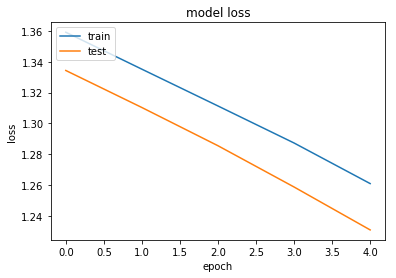

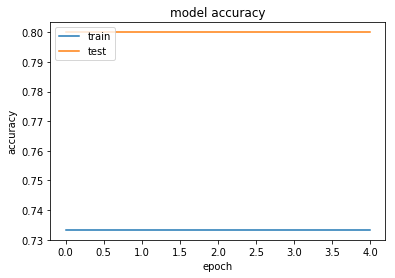

In [19]:
plot_loss(hist)
plot_acc(hist)

### Model with an LSTM layer

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedded_dim,input_length=max_len),
    tf.keras.layers.LSTM(10, return_sequences=True),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='adam')


In [21]:
hist = model.fit(padded,y_train, epochs=5, validation_data=(testing_padded,y_test))

Train on 150 samples, validate on 50 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
150/150 [==============================] - 1s 9ms/sample - loss: 1.3856 - acc: 0.1733 - val_loss: 1.3722 - val_acc: 0.8000
Epoch 2/5
150/150 [==============================] - 1s 4ms/sample - loss: 1.3678 - acc: 0.7333 - val_loss: 1.3560 - val_acc: 0.8000
Epoch 3/5
150/150 [==============================] - 1s 4ms/sample - loss: 1.3521 - acc: 0.7333 - val_loss: 1.3379 - val_acc: 0.8000
Epoch 4/5
150/150 [==============================] - 1s 4ms/sample - loss: 1.3339 - acc: 0.7333 - val_loss: 1.3176 - val_acc: 0.8000
Epoch 5/5
150/150 [==============================] - 1s 4ms/sample - loss: 1.3138 - acc: 0.7333 - val_loss: 1.2941 - val_acc: 0.8000


In [22]:
hist.history

{'loss': [1.3856255308787029,
  1.3677747917175294,
  1.3520686864852904,
  1.3338922770818074,
  1.3137598498662313],
 'acc': [0.17333333, 0.73333335, 0.73333335, 0.73333335, 0.73333335],
 'val_loss': [1.3721568870544434,
  1.3560401916503906,
  1.3378776979446412,
  1.3175827693939208,
  1.2940862417221068],
 'val_acc': [0.8, 0.8, 0.8, 0.8, 0.8]}

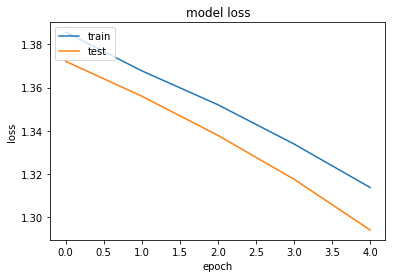

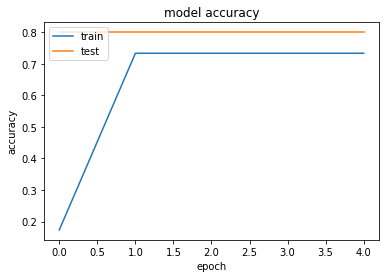

In [23]:
plot_loss(hist)
plot_acc(hist)

### Model with a CNN layer

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedded_dim,input_length=max_len),
    tf.keras.layers.Conv1D(32, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',metrics=['acc'], optimizer='adam')


In [25]:
hist = model.fit(padded,y_train, epochs=5, validation_data=(testing_padded,y_test))

Train on 150 samples, validate on 50 samples
Epoch 1/5
150/150 [==============================] - 0s 1ms/sample - loss: 1.4225 - acc: 0.2533 - val_loss: 1.3845 - val_acc: 0.2000
Epoch 2/5
150/150 [==============================] - 0s 113us/sample - loss: 1.3524 - acc: 0.2667 - val_loss: 1.3315 - val_acc: 0.2200
Epoch 3/5
150/150 [==============================] - 0s 107us/sample - loss: 1.3019 - acc: 0.6267 - val_loss: 1.2854 - val_acc: 0.8200
Epoch 4/5
150/150 [==============================] - 0s 100us/sample - loss: 1.2545 - acc: 0.8867 - val_loss: 1.2380 - val_acc: 0.8000
Epoch 5/5
150/150 [==============================] - 0s 100us/sample - loss: 1.2043 - acc: 0.7400 - val_loss: 1.1882 - val_acc: 0.8000


In [26]:
hist.history

{'loss': [1.4224979019165038,
  1.3524122937520344,
  1.3018540302912394,
  1.2544588470458984,
  1.20431325117747],
 'acc': [0.25333333, 0.26666668, 0.62666667, 0.88666666, 0.74],
 'val_loss': [1.3845302867889404,
  1.3314904594421386,
  1.2853680229187012,
  1.2380325126647949,
  1.1881902265548705],
 'val_acc': [0.2, 0.22, 0.82, 0.8, 0.8]}

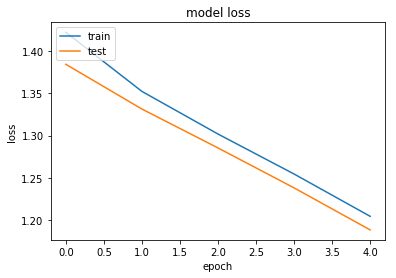

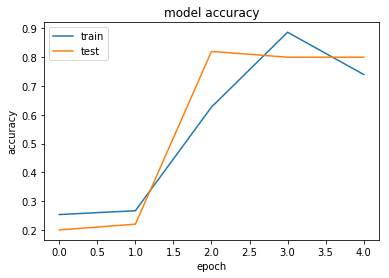

In [27]:
plot_loss(hist)
plot_acc(hist)

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 8)            16000     
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 32)           1312      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 30)                990       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 124       
Total params: 18,426
Trainable params: 18,426
Non-trainable params: 0
_________________________________________________________________


#### The model is overfitting the data, due to the small size of the dataset.